# Sessie 05 - Opdracht Decision Trees 

In [1]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint 
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

## Oefening 2 - NASA
Gegeven is de dataset **nasa.csv**. Deze dataset bevat gegevens en metingen van waargenomen meteorieten. De bedoeling is om op basis van deze metingen (features) een betrouwbare voorspelling te kunnen doen of een bepaalde meteoriet al dan niet gevaarlijk is. Of ze met andere woorden kan inslaan op de aarde.
Er wordt een accuracy van minstens 95% geëist.

### Inlezen en preprocessing van de dataset

1.  Verwijder de kolommen 'Neo Reference ID', 'Name', 'Close Approach Date','Epoch Date Close Approach', 'Orbiting Body','Orbit Determination Date' en 'Equinox'
2. Verwijder de samples met ontbrekende waarden volledig(listwise deletion)
3. Kuis de data op waar nodig
4. Vervang de waarden uit de output kolom Hazardous: False / True -> 0 / 1
5. Voer one-hot encoding uit op de categorische variabelen

In [2]:
# Inladen van de dataset
dataset = pd.read_csv('Sensor_data.csv')
dataset.head()

PartitionKey                                RowKey  \
0  F0:08:D1:C8:A7:34  03674838-7a7d-4f65-a8ff-11315e0d3d10   
1  F0:08:D1:C8:A7:34  0376173d-7059-4211-b4a1-7c168b32ce98   
2  F0:08:D1:C8:A7:34  0628a786-28da-4c9f-97fc-6ee240e75782   
3  F0:08:D1:C8:A7:34  062a202a-19cc-4c61-814f-7458a33e04d0   
4  F0:08:D1:C8:A7:34  06e05b50-bcbf-4fad-a713-c19975ef4b42   

                      Timestamp  RackRow RackRow@type  Label Label@type  \
0  2022-05-28T13:58:26.3120062Z        2        Int32     21      Int32   
1  2022-05-28T14:26:33.9141792Z        2        Int32     20      Int32   
2  2022-05-28T14:24:57.4637252Z        2        Int32     13      Int32   
3  2022-05-28T14:26:42.7918921Z        2        Int32     21      Int32   
4  2022-05-25T13:16:47.9637282Z        2        Int32      3      Int32   

   WeightPre WeightPre@type  WeightPost WeightPost@type  WeightDiff  \
0          0          Int32           0           Int32           0   
1          0          Int32           0           Int32           0   
2          0          Int32           0           Int32           0   
3          0          Int32           0           Int32           0   
4          0          Int32           0           Int32           0   

  WeightDiff@type  DistMinH DistMinH@type  DistMaxH DistMaxH@type  DistAvgH  \
0           Int32        27         Int32        36         Int32        31   
1           Int32        31         Int32        37         Int32        33   
2           Int32        38         Int32        43         Int32        40   
3           Int32        24         Int32        30         Int32        26   
4           Int32        27         Int32        29         Int32        28   

  DistAvgH@type  DistMinL DistMinL@type  DistMaxL DistMaxL@type  DistAvgL  \
0         Int32        27         Int32        36         Int32        31   
1         Int32        31         Int32        42         Int32        35   
2         Int32        37         Int32        43         Int32        40   
3         Int32        24         Int32        30         Int32        26   
4         Int32        27         Int32        29         Int32        28   

  DistAvgL@type  DistTime DistTime@type  
0         Int32      3358         Int32  
1         Int32      1870         Int32  
2         Int32      2063         Int32  
3         Int32      1686         Int32  
4         Int32       207         Int32

In [3]:



#'PartitionKey''RowKey'
# delete irrelevant columns(id's,types)
dataset.drop(['Timestamp','RackRow'],axis=1,inplace=True)
dataset.drop('RackRow@type',axis=1,inplace=True)
dataset.drop('Label@type',axis=1,inplace=True)
dataset.drop(['PartitionKey'],axis=1, inplace=True)
dataset.drop(['RowKey'],axis=1, inplace=True)

# delete all columns  weight 
dataset.drop(['WeightPre','WeightPre@type','WeightPost','WeightPost@type', 'WeightDiff','WeightDiff@type'],axis=1,inplace=True)


#delete (type) columns  distance
dataset.drop(['DistMinH@type','DistMaxH@type','DistAvgH@type','DistMinL@type', 'DistMaxL@type','DistAvgL@type', 'DistTime@type'],axis=1,inplace=True)


#one hot encoding
#dataset = pd.concat([dataset,pd.get_dummies(dataset['RowKey'], prefix='RowKey')],axis=1)
#dataset = pd.concat([dataset,pd.get_dummies(dataset['PartitionKey'], prefix='PartitionKey')],axis=1)




dataset.head(25)







Label  DistMinH  DistMaxH  DistAvgH  DistMinL  DistMaxL  DistAvgL  \
0      21        27        36        31        27        36        31   
1      20        31        37        33        31        42        35   
2      13        38        43        40        37        43        40   
3      21        24        30        26        24        30        26   
4       3        27        29        28        27        29        28   
5       6         4         8         4         4         8         4   
6       4        21        24        21        21        26        23   
7      13        33        43        39        33        43        39   
8      10        22        24        23        23        24        23   
9       4        15        17        15        15        17        15   
10      2        32        34        33        32        34        33   
11     19        39        43        40        39        42        39   
12     24         6        20         9         6        20         9   
13      3        17        20        18        17        19        18   
14     14        29        38        33        30        38        33   
15     23        13        17        13        13        17        13   
16      6         9        10         9         9        15        11   
17     15        24        28        26        24        26        25   
18      3        27        30        27        27        30        27   
19      2        32        34        33        33        34        33   
20     21        29        30        29        29        30        29   
21     16        16        18        16        16        17        16   
22     11        10        13        11        10        13        11   
23      2        32        35        32        32        35        32   
24     20        35        38        36        35        38        36   

    DistTime  
0       3358  
1       1870  
2       2063  
3       1686  
4        207  
5       2406  
6       2601  
7       2809  
8       1877  
9       1680  
10      1136  
11      2064  
12      2046  
13      1497  
14      1873  
15      1678  
16       513  
17      2422  
18      2999  
19      1886  
20       765  
21      2416  
22      1679  
23      1701  
24      2242

In [4]:
#Toevoegen van 'leftside_crate' kolom op basis van labels (1-3,7-9,13-15,19-21)
dataset.insert(0,'side_crate', dataset['Label'])


# leftside_crate waarden links is 0, rechts is 1
#Rij1
dataset['side_crate'].values[dataset['Label'] == 1] = 0
dataset['side_crate'].values[dataset['Label'] == 2] = 0
dataset['side_crate'].values[dataset['Label'] == 3] = 0
dataset['side_crate'].values[dataset['Label'] == 4] = 1
dataset['side_crate'].values[dataset['Label'] == 5] = 1
dataset['side_crate'].values[dataset['Label'] == 6] = 1

#Rij2
dataset['side_crate'].values[dataset['Label'] == 7] = 0
dataset['side_crate'].values[dataset['Label'] == 8] = 0
dataset['side_crate'].values[dataset['Label'] == 9] = 0
dataset['side_crate'].values[dataset['Label'] == 10] = 1
dataset['side_crate'].values[dataset['Label'] == 11] = 1
dataset['side_crate'].values[dataset['Label'] == 12] = 1

#Rij3
dataset['side_crate'].values[dataset['Label'] == 13] = 0
dataset['side_crate'].values[dataset['Label'] == 14] = 0
dataset['side_crate'].values[dataset['Label'] == 15] = 0
dataset['side_crate'].values[dataset['Label'] == 16] = 1
dataset['side_crate'].values[dataset['Label'] == 17] = 1
dataset['side_crate'].values[dataset['Label'] == 18] = 1

#Rij4
dataset['side_crate'].values[dataset['Label'] == 19] = 0
dataset['side_crate'].values[dataset['Label'] == 20] = 0
dataset['side_crate'].values[dataset['Label'] == 21] = 0
dataset['side_crate'].values[dataset['Label'] == 22] = 1
dataset['side_crate'].values[dataset['Label'] == 23] = 1
dataset['side_crate'].values[dataset['Label'] ==24] = 1

#originele Label feature verwijderen
dataset.drop('Label',axis=1,inplace=True)
#DistTime droppen
#standaardafwijking als extra feature
#Decision tree/random forest tree



dataset.head(40)

side_crate  DistMinH  DistMaxH  DistAvgH  DistMinL  DistMaxL  DistAvgL  \
0            0        27        36        31        27        36        31   
1            0        31        37        33        31        42        35   
2            0        38        43        40        37        43        40   
3            0        24        30        26        24        30        26   
4            0        27        29        28        27        29        28   
5            1         4         8         4         4         8         4   
6            1        21        24        21        21        26        23   
7            0        33        43        39        33        43        39   
8            1        22        24        23        23        24        23   
9            1        15        17        15        15        17        15   
10           0        32        34        33        32        34        33   
11           0        39        43        40        39        42        39   
12           1         6        20         9         6        20         9   
13           0        17        20        18        17        19        18   
14           0        29        38        33        30        38        33   
15           1        13        17        13        13        17        13   
16           1         9        10         9         9        15        11   
17           0        24        28        26        24        26        25   
18           0        27        30        27        27        30        27   
19           0        32        34        33        33        34        33   
20           0        29        30        29        29        30        29   
21           1        16        18        16        16        17        16   
22           1        10        13        11        10        13        11   
23           0        32        35        32        32        35        32   
24           0        35        38        36        35        38        36   
25           1         7        11         7         7        12         7   
26           0        32        35        32        32        35        32   
27           1        19        22        19        19        22        19   
28           0        31        32        31        31        32        31   
29           1         9        11         9         9        11         9   
30           1         4        10         5         4        10         5   
31           1        12        16        14        12        16        14   
32           0        26        43        33        26        43        33   
33           0        27        42        35        27        42        35   
34           0        22        31        24        22        31        24   
35           0        38        42        39        38        43        39   
36           1         9        12        10         9        12        10   
37           1         6        10         8         6        10         8   
38           0        23        29        27        23        30        27   
39           1        10        11        10        10        11        10   

    DistTime  
0       3358  
1       1870  
2       2063  
3       1686  
4        207  
5       2406  
6       2601  
7       2809  
8       1877  
9       1680  
10      1136  
11      2064  
12      2046  
13      1497  
14      1873  
15      1678  
16       513  
17      2422  
18      2999  
19      1886  
20       765  
21      2416  
22      1679  
23      1701  
24      2242  
25      1674  
26      2075  
27      1862  
28       908  
29      2719  
30      2219  
31      1135  
32      6758  
33      6539  
34      1686  
35      1690  
36       574  
37      1866  
38      2979  
39      1862

Text(0.5, 1.0, 'Countplot side_crate')

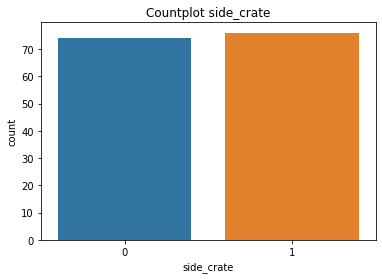

In [5]:
# gebalanceerdheid controleren/check balance
sns.countplot(data=dataset, x="side_crate")
plt.title('Countplot side_crate')


Controleer of de dataset al dan niet **gebalanceerd** is. **Antwoord** duidelijk of dit al dan niet het geval is en wat de **mogelijke gevolgen** kunnen zijn mocht deze niet gebalanceerd zijn.

Splits eerst de features op in een training- en test set. 

Zorg ervoor dat er exact **1000 samples** in de test set steken en gebruik een **random_state = 0**.

In [6]:
# Opsplitsen in features en targets. 


# Opsplitsen in test en training_set met 1000 waarden in test set en random_state = 0. Normaliseer de features.

# Opsplitsen in features en targets

y= dataset['side_crate'].values

X = dataset.drop('side_crate',axis=1)

# Opsplitsen in test en training_set met 1000 waarden in test set en random_state = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =0)

#scalen
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)




Train zowel een logistic regression en SVM classifier. Je mag onmiddellijk het optimale model zoeken via cross-validation. Test deze classifiers: bepaal de accuracy, precision, recall, f1-score en ROC (waar mogelijk)

In [7]:
# Grid search logistic regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
paramaters = [
             {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000]}                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Best accuracy :  0.94
Best parameters : {'C': 0.001}
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.94      0.81      0.87        21

    accuracy                           0.90        50
   macro avg       0.91      0.89      0.89        50
weighted avg       0.90      0.90      0.90        50

[[28  1]
 [ 4 17]]
90.0


In [8]:

logreg = linear_model.LogisticRegression(C=0.001, solver='lbfgs', class_weight = 'balanced' ) # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,



    # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)

# testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)


print(confusion_matrix(y_test,y_pred))


coefficiënten:  [[-0.04112984 -0.04797628 -0.04820273 -0.03998665 -0.04418091 -0.04542046
  -0.00028412]]
intercept: [6.74695655]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.95      0.90      0.93        21

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

94.0
[[28  1]
 [ 2 19]]


In [9]:
# Voorspelling van de side_crate. GRID SEARCH LOGISTIC REGRESSION
side_crate = np.array([[4,10,5,4,10,5,2219]])

#scaling
#scaler.transform(side_crate)

print(grid_search.predict(side_crate))


print(grid_search.predict_proba(np.array([4,10,5,4,10,5,2219]).reshape(1,-1)))



#predictie van 0
#27,29,28,27,29,28,207
#38,42,39,38,43,39,1690
#38,43,40,37,43,40,2063 waarde 0 = 1.00000000e+000 1.99957909e-176
#29,38,33,30,38,33,1873 waarde 0 = 1.00000000e+000 1.92194372e-159
#32,35,32,32,35,32,2075 waarde 0 = 1.00000000e+000 1.78440863e-150
#29,30,29,29,30,29,765 waarde 0 = 1.00000000e+00 2.10910092e-92
#26,43,33,26,43,33,6758 waarde 0 = 1. 0.

#predictie van 1
#20,23,21,20,24,22,948 waarde 0 = 1.00000000e+00 1.08050684e-82   X
#15,17,15,15,17,15,1680  waarde  1 = 0.36902706 0.63097294 x 0.39693922 0.60306078
#9,10,9,9,15,11,513 = 0.36576179 0.63423821
#6,20,9,6,20,9,2046 waarde 1 = 0.38366287 0.61633713
#4,10,5,4,10,5,2219 eerst waarde 0 MAAR bij opnieuw runnen waarde 1!! 
#6,20,9,6,20,9,2046 eerst waarde 0 MAAR bij opnieuw runnen waarde 1 = 0.35601394 0.64398606
#12,16,14,12,16,14,1135 eerst waarde 0 MAAR bij opnieuw runnen waarde 1 = 0.36648388 0.63351612
#9,12,10,9,12,10,574

[1]
[[0.02027001 0.97972999]]


C:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
import pickle

In [11]:
filename = 'finalized_model2.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [12]:
print(y_pred)

[0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 0]


In [ ]:
# Grid search Support Vector Machine

model = SVC(probability=True)
paramaters = [ 
        {'kernel': ['linear'], 'C': np.linspace(1,20,10)},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.0001, 0.01, 0.1]},
        {'kernel': ['poly'], 'C':[1, 10]} ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred) * 100)

In [ ]:
# Voorspelling van de side_crate. GRID SEARCH SVM
side_crate = np.array([[38,43,40,37,43,40,2063]])

#scaling
scaler.transform(side_crate)

print(grid_search.predict(side_crate))

#logreg of grid_search hier?
print(grid_search.predict_proba(np.array([38,43,40,37,43,40,2063]).reshape(1,-1)))



#predictie van 0
#27,29,28,27,29,28,207
#38,43,40,37,43,40,2063 waarde 1 = 0.39531865 0.60468135 X
#29,38,33,30,38,33,1873 waarde 1 = 0.37657733 0.62342267 X
#32,35,32,32,35,32,2075 waarde 1 = 0.3802971 0.6197029 X
#29,30,29,29,30,29,765  waarde 1 = 0.38687197 0.61312803 X

#predictie van 1
#20,23,21,20,24,22,948 waarde 1 = 0.39693922 0.60306078 , 0.39758044 0.60241956
#15,17,15,15,17,15,1680 waarde 1 = 0.36313254 0.63686746 , 0.37559007 0.62440993
#9,10,9,9,15,11,513  waarde 1= 0.36902706 0.63097294,0.36413252 0.63586748 
#6,20,9,6,20,9,2046 waarde 1 = 0.37764602 0.62235398
#4,10,5,4,10,5,2219 waarde 1 = 0.37026731 0.62973269
#6,20,9,6,20,9,2046 waarde 1 = 0.35601394 0.64398606

Train een **Random Forest Classifier**. 
- Test deze classifier op de trainingset. Wat zijn jouw bevindingen en conclusies? Vergelijk de resultaten met deze van logistic regression en SVM.

Een lijst van hyperparameters zijn te vinden via https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Bepaal via deze random forest tree classifier de belangrijkste features. 
- Onderzoek of je via boosting (Adaboost/Gradient boosting) de accuraatheid kunt verhogen.
- Onderzoek of je via stacking tot een beter model kunt komen.
- Maak ook eens gebruik van een AutoML model TPOT (http://epistasislab.github.io/tpot/) en bespreek tot welke resultaten je daarmee komt. Vergelijk deze met de resultaten van de eigen getrainde modellen.

In [ ]:
# Trainen en testen van een random forest tree classifier
number_of_trees = 200
max_number_of_features = 4

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

In [ ]:
# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

In [ ]:
# Voorspelling van de side_crate.  Random Forest Classifier
side_crate = np.array([[38,43,40,37,43,40,2063]])

#scaling
scaler.transform(side_crate)

print(RFCmodel.predict(side_crate))

#logreg of grid_search hier?
print(RFCmodel.predict_proba(np.array([38,43,40,37,43,40,2063]).reshape(1,-1)))



#predictie van 0
#27,29,28,27,29,28,207
#38,43,40,37,43,40,2063 waarde 1 = 0.37 0.63 X
#29,38,33,30,38,33,1873 waarde 1 = 0.36 0.64 X
#32,35,32,32,35,32,2075 waarde 1 = 0.425 0.575  X
#29,30,29,29,30,29,765 waarde 1 = 0.385 0.615

#predictie van 1
#20,23,21,20,24,22,948  waarde 1 = 0.355 0.645
#15,17,15,15,17,15,1680 waarde 1 = 2.60837432e-06 9.99997392e-01
#9,10,9,9,15,11,513 waarde 1 = 0.35 0.65
#6,20,9,6,20,9,2046 waarde 1 = 0.36 0.64
#4,10,5,4,10,5,2219 waarde 1 = 0.39 0.61

Bepaal uit de gertrainde Random Forest Classifier de belangrijkheid van de features (model.feature_importances_). 

Welke zijn de 10 belangrijkste features?

Train het model opnieuw met deze 10 belangrijkste features. Test het model en verklaar de resulaten.

Reduceer het aantal features nog verder en bekijk telkens de accuracy. Verklaar de resultaten.

In [ ]:
# Reduceren van het aantal features en hertrainen via een random forest classifier.

# top 10 meest belangrijke features

RFCmodel_reduced = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

importance = RFCmodel.feature_importances_

print(importance)

# index van de 10 belangrijkste features:

ind = np.argpartition(importance,-4)[-4:]

print(ind)

X_train_reduced = X_train[:,ind]
X_test_reduced = X_test[:,ind]

# hertrainen van Random Forest Tree Classifier

RFCmodel_reduced.fit(X_train_reduced,y_train)

y_pred_reduced = RFCmodel_reduced.predict(X_test_reduced)

print(classification_report(y_test, y_pred_reduced))

cf = confusion_matrix(y_test, y_pred_reduced)
#print(cf)
print(accuracy_score(y_test, y_pred_reduced) * 100) 


Kijk of je via boosting (Adaboost/gradient boosting) de accuracy op de test set nog kunt verhogen. Het type classifier (base estimator) mag je zelf kiezen.

In [ ]:
# Boosting
# Adaboost
clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

In [ ]:
# Gradient boosting

clf_gradientboost = GradientBoostingClassifier(n_estimators=600,learning_rate=0.95)

clf_gradientboost.fit(X_train,y_train)


y_pred = clf_gradientboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

In [ ]:
# Voorspelling van de side_crate.  Random Forest(Gradient boosting)
side_crate = np.array([[4,10,5,4,10,5,2219]])

#scaling
scaler.transform(side_crate)

print(clf_gradientboost.predict(side_crate))

#logreg of grid_search hier?
print(clf_gradientboost.predict_proba(np.array([4,10,5,4,10,5,2219]).reshape(1,-1)))



#predictie van 0
#27,29,28,27,29,28,207
#38,43,40,37,43,40,2063 waarde 1 = 2.60837432e-06 9.99997392e-01 X
#29,38,33,30,38,33,1873 waarde 1 = 2.60837432e-06 9.99997392e-01 X
#32,35,32,32,35,32,2075 waarde 1 = 2.60837432e-06 9.99997392e-01 X
#29,30,29,29,30,29,765 waarde 1 = 2.60837432e-06 9.99997392e-01

#predictie van 1
#20,23,21,20,24,22,948  waarde 1 = 2.60837432e-06 9.99997392e-01
#15,17,15,15,17,15,1680 waarde 1 = 2.60837432e-06 9.99997392e-01
#9,10,9,9,15,11,513  waarde 1  = 0.36902706 0.63097294, 2.60837432e-06 9.99997392e-01
#6,20,9,6,20,9,2046 waarde 1 = 2.60837432e-06 9.99997392e-01
#4,10,5,4,10,5,2219 waarde 1 = 2.60837432e-06 9.99997392e-01

Train een stacking classifier. De estimators mag je zelf kiezen. Als metalearner opteer je best voor een logistic regression classifier.

In [ ]:
# Stacking

estimators = [
    ('svc', SVC(C=10,kernel='rbf')),
    ('nb' , GaussianNB()),
    ('rfc', RandomForestClassifier(n_estimators = 100))
]
    
lr = LogisticRegression()  
    
stacked_model = StackingClassifier(
estimators=estimators, final_estimator=lr,cv=5,n_jobs=-1)    
    
stacked_model.fit(X_train,y_train)


y_pred = stacked_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

In [ ]:
stacked_model.transform(X_test)

AutoML via TPOT

In [ ]:
# TPOT
from tpot import TPOTClassifier

TP_model = TPOTClassifier(generations=5, population_size=20, cv=5, n_jobs = -1,scoring='accuracy')

TP_model.fit(X_train,y_train)

y_pred = TP_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

TP_model.export('best_TP_Model.py')

In [ ]:
TP_model.evaluated_individuals_